In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv('data-points.csv')

# Print shape
print('Shape:', data_df.shape) # (50, 2)

# First five rows
data_df.head()

Shape: (50, 2)


,x,y
0,0.000,0.706
1,0.020,0.288
2,0.041,0.645
3,0.061,1.272
4,0.082,1.238


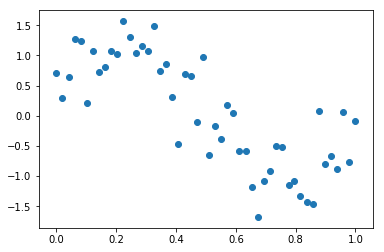

In [2]:
x = data_df.x.values
y = data_df.y.values

# Plot data points
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Create the polynomial features
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_obj.fit_transform(x[:, np.newaxis])

print('Shape:', X_poly.shape) # (50, 10)
print('Features:', poly_obj.get_feature_names())

Shape: (50, 10)
Features: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


In [4]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X_poly, y, test_size=25, random_state=0)

print('Train set:', X_tr.shape, y_tr.shape) # (25, 10) (25,)
print('Test set:', X_te.shape, y_te.shape)

Train set: (25, 10) (25,)
Test set: (25, 10) (25,)


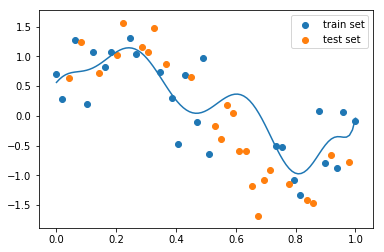

In [5]:
from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()
lr.fit(X_tr, y_tr)

# Plot the model
x_values = np.linspace(min(x), max(x), num=100)
x_values_poly = poly_obj.transform(x_values[:, np.newaxis])
y_values_lr = lr.predict(x_values_poly)

plt.scatter(X_tr[:, 0], y_tr, label='train set')
plt.scatter(X_te[:, 0], y_te, label='test set')
plt.plot(x_values, y_values_lr)
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error as mse

y_pred = lr.predict(X_tr)
print('Train MSE: {:.2f}'.format(mse(y_tr, y_pred)))
# Prints: 0.18

# Test score
y_pred = lr.predict(X_te)
print('Test MSE: {:.2f}'.format(mse(y_te, y_pred)))
# Prints: 0.45

Train MSE: 0.18
Test MSE: 0.45


## Ridge Regression

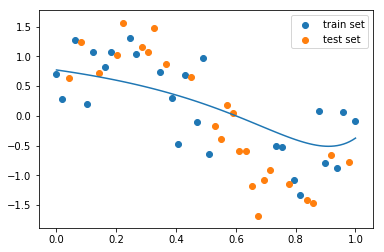

In [8]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge()
ridge.fit(X_tr, y_tr)

# Plot the model
y_values_ridge = ridge.predict(x_values_poly)

plt.scatter(X_tr[:, 0], y_tr, label='train set')
plt.scatter(X_te[:, 0], y_te, label='test set')
plt.plot(x_values, y_values_ridge)
plt.legend()
plt.show()

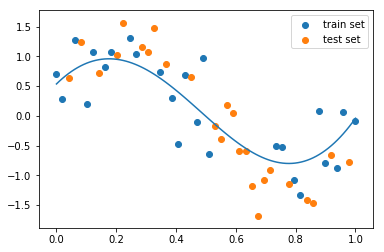

In [9]:
ridge2 = Ridge(alpha=1e-4)
ridge2.fit(X_tr, y_tr)

# Plot the model
y_values_ridge2 = ridge2.predict(x_values_poly)

plt.scatter(X_tr[:, 0], y_tr, label='train set')
plt.scatter(X_te[:, 0], y_te, label='test set')
plt.plot(x_values, y_values_ridge2)
plt.legend()
plt.show()

In [10]:
y_pred = ridge2.predict(X_tr)
print('Train MSE: {:.2f}'.format(mse(y_tr, y_pred)))
# Prints: 0.19

# Test score
y_pred = ridge2.predict(X_te)
print('Test MSE: {:.2f}'.format(mse(y_te, y_pred)))

Train MSE: 0.19
Test MSE: 0.21


In [11]:
features = poly_obj.get_feature_names()
for feature, coef in zip(features, lr.coef_):
    print('{}: {:.1f}'.format(feature, coef))

x0: 5.9
x0^2: -45.8
x0^3: -534.7
x0^4: 11490.9
x0^5: -73308.3
x0^6: 230833.5
x0^7: -404599.2
x0^8: 402333.8
x0^9: -212583.7
x0^10: 46407.0


In [12]:
for feature, coef in zip(features, ridge2.coef_):
    print('{}: {:.1f}'.format(feature, coef))

x0: 4.9
x0^2: -14.8
x0^3: 0.8
x0^4: 7.5
x0^5: 4.6
x0^6: -0.0
x0^7: -2.4
x0^8: -2.2
x0^9: -0.5
x0^10: 1.6


## Lasso

C:\Users\eric\Anaconda2\envs\exts-ada\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


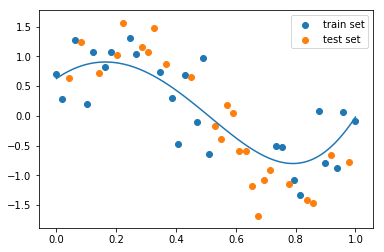

In [14]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso = Lasso(alpha=1e-4)
lasso.fit(X_tr, y_tr)

# Plot the model
y_values_lasso = lasso.predict(x_values_poly)

plt.scatter(X_tr[:, 0], y_tr, label='train set')
plt.scatter(X_te[:, 0], y_te, label='test set')
plt.plot(x_values, y_values_lasso)
plt.legend()
plt.show()

In [15]:
lasso = Lasso(alpha=1e-4, max_iter=100000)
lasso.fit(X_tr, y_tr)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
for feature, coef in zip(features, lasso.coef_):
    print('{}: {:.1f}'.format(feature, coef))

x0: 4.3
x0^2: -13.1
x0^3: 0.0
x0^4: 8.8
x0^5: 0.0
x0^6: 0.0
x0^7: -0.0
x0^8: -0.0
x0^9: -0.0
x0^10: -0.7


## Grid Search

In [17]:
import pandas as pd

# Load the data
data_df = pd.read_csv('data-points.csv')

# Create x, y variables
x = data_df.x.values
y = data_df.y.values

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Create the polynomial features
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_obj.fit_transform(x[:, np.newaxis])

In [19]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X_poly, y, test_size=25, random_state=0)

In [20]:
alphas = np.logspace(-20, 10, num=100)

In [21]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge

# Save error on train/test sets
train_scores = []
test_scores = []

# Grid search
for alpha in alphas:
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr, y_tr)

    # Performance on train set
    y_pred = ridge.predict(X_tr)
    train_mse = mse(y_tr, y_pred)
    train_scores.append(train_mse)

    # Performance on test set
    y_pred = ridge.predict(X_te)
    test_mse = mse(y_te, y_pred)
    test_scores.append(test_mse)

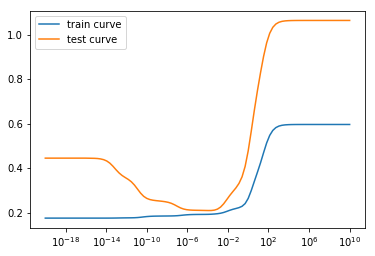

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [24]:
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
best_score = test_scores[idx]

print('Best alpha value {:.1e} with score {:.2f}'.format(
    best_alpha, best_score))

Best alpha value 1.1e-04 with score 0.21
